This notebook is to plot the variables computed in SQL

In [6]:
import pandas as pd
import sys

sys.path.append('../')

from cool_train.data_cleaning import filter_impossible_values, filter_zeros
from cool_train.data_loading import correct_column_types

In [7]:
df = pd.read_csv('../dataset/train_136/train_136.csv',sep=';')
df

,id,vehicle_id,timestamps_UTC,Insert_Datetime,lat,lon,RS_E_InAirTemp_PC1,RS_E_InAirTemp_PC2,RS_E_OilPress_PC1,RS_E_OilPress_PC2,...,RS_E_RPM_PC2_AVG_MOB,RS_E_RPM_PC2_AVG_DAY,RS_E_WatTemp_PC1_AVG_MOB,RS_E_WatTemp_PC1_AVG_DAY,RS_E_WatTemp_PC2_AVG_MOB,RS_E_WatTemp_PC2_AVG_DAY,RS_T_OilTemp_PC1_AVG_MOB,RS_T_OilTemp_PC1_AVG_DAY,RS_T_OilTemp_PC2_AVG_MOB,RS_T_OilTemp_PC2_AVG_DAY
0,3462971,136,2023-01-23 08:26:04.000,2023-11-06 14:48:39.443,51.038378,5.280001,38,35,182,690,...,NaN,"1120,933471",NaN,"81,41717172",NaN,"81,95775941",NaN,"80,23838384",NaN,"81,48218549"
1,7090263,136,2023-01-23 08:27:04.000,2023-11-06 14:48:39.443,51.038391,5.279761,39,35,365,690,...,NaN,"1120,933471",NaN,"81,41717172",NaN,"81,95775941",NaN,"80,23838384",NaN,"81,48218549"
2,11569,136,2023-01-23 08:28:04.000,2023-11-06 14:48:39.443,51.039809,5.265581,46,42,345,690,...,NaN,"1120,933471",NaN,"81,41717172",NaN,"81,95775941",NaN,"80,23838384",NaN,"81,48218549"
3,3462970,136,2023-01-23 08:28:05.000,2023-11-06 14:48:39.443,51.039767,5.265853,46,45,341,690,...,NaN,"1120,933471",NaN,"81,41717172",NaN,"81,95775941",NaN,"80,23838384",NaN,"81,48218549"
4,7282812,136,2023-01-23 08:29:05.000,2023-11-06 14:48:39.443,51.047337,5.243465,39,38,360,690,...,NaN,"1120,933471",NaN,"81,41717172",NaN,"81,95775941",NaN,"80,23838384",NaN,"81,48218549"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
374972,16926157,136,2023-09-13 21:45:47.000,2023-11-06 14:48:39.443,50.936613,5.306404,21,47,0,6,...,NaN,"374,0810811",NaN,"19,18918919",NaN,"54,06756757",NaN,"17,68918919",NaN,"47,89189189"
374973,13794484,136,2023-09-13 21:46:28.000,2023-11-06 14:48:39.443,50.936764,5.305734,21,47,0,6,...,NaN,"374,0810811",NaN,"19,18918919",NaN,"54,06756757",NaN,"17,68918919",NaN,"47,89189189"
374974,15547260,136,2023-09-13 21:46:47.000,2023-11-06 14:48:39.443,50.936577,5.306441,21,47,0,6,...,NaN,"374,0810811",NaN,"19,18918919",NaN,"54,06756757",NaN,"17,68918919",NaN,"47,89189189"
374975,4992169,136,2023-09-13 21:47:29.000,2023-11-06 14:48:39.443,50.936786,5.305697,21,48,0,6,...,NaN,"374,0810811",NaN,"19,18918919",NaN,"54,06756757",NaN,"17,68918919",NaN,"47,89189189"


In [8]:
df.columns 

Index(['id', 'vehicle_id', 'timestamps_UTC', 'Insert_Datetime', 'lat', 'lon',
       'RS_E_InAirTemp_PC1', 'RS_E_InAirTemp_PC2', 'RS_E_OilPress_PC1',
       'RS_E_OilPress_PC2', 'RS_E_RPM_PC1', 'RS_E_RPM_PC2', 'RS_E_WatTemp_PC1',
       'RS_E_WatTemp_PC2', 'RS_T_OilTemp_PC1', 'RS_T_OilTemp_PC2',
       'Sensors_NB_Fail', 'OutOfRange_NB', 'IsInvalidLine', 'IsTreated',
       'ID_Org', 'mapped_veh_id_Org', 'Distance', 'IsMoving', 'MovingSpeed',
       'RS_E_InAirTemp_Delta', 'RS_E_InAirTemp_Delta_Percent',
       'RS_E_OilPress_Delta', 'RS_E_OilPress_Delta_Percent', 'RS_E_RPM_Delta',
       'RS_E_RPM_Delta_Percent', 'RS_E_WatTemp_Delta',
       'RS_E_WatTemp_Delta_Percent', 'RS_T_OilTemp_Delta',
       'RS_T_OilTemp_Delta_Percent', 'RS_E_InAirTemp_PC1_AVG_MOB',
       'RS_E_InAirTemp_PC1_AVG_DAY', 'RS_E_InAirTemp_PC2_AVG_MOB',
       'RS_E_InAirTemp_PC2_AVG_DAY', 'RS_E_OilPress_PC1_AVG_MOB',
       'RS_E_OilPress_PC1_AVG_DAY', 'RS_E_OilPress_PC2_AVG_MOB',
       'RS_E_OilPress_PC2_AVG_DA

In [26]:
df[['Distance', 'IsMoving', 'MovingSpeed']].describe()

,Distance,IsMoving,MovingSpeed
count,374977.000000,374977.000000,374977.000000
mean,274.538370,0.931860,50.474236
std,531.418584,0.251987,172.403491
min,0.000000,0.000000,0.000000
25%,46.104364,1.000000,4.158448
50%,50.596351,1.000000,28.528459
75%,252.297788,1.000000,79.195799
max,78421.740450,1.000000,25617.582040


In [52]:
df['Distance'] = df['Distance'].str.replace(',', '.').astype(float)
df['MovingSpeed'] = df['MovingSpeed'].str.replace(',', '.').astype(float)
#df['RS_E_RPM_PC1'] = df['RS_E_RPM_PC1'].str.replace(',', '.').astype(float)

AttributeError: Can only use .str accessor with string values!

<Axes: >

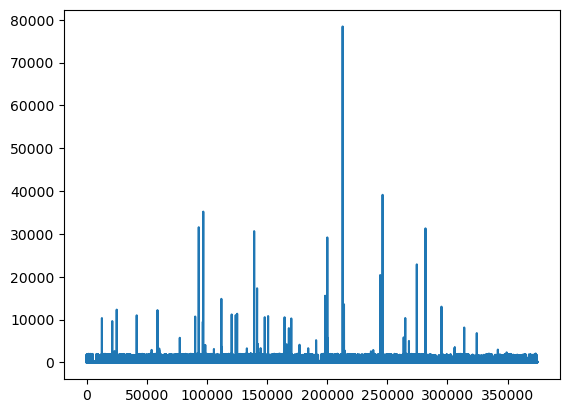

In [20]:
import pandas as pd
import plotly.express as px


# Select range
start_date = pd.Timestamp('2023-01-01',tz='Europe/Brussels')
end_date = pd.Timestamp('2023-03-01',tz='Europe/Brussels')

# Define a threshold for acceptable speed values
speed_threshold = 0.1

# Filter out aberrant speed values
filtered_df = df[df['MovingSpeed'] <= speed_threshold]

# Apply rolling window for smoothing\
window_size = '10T'
filtered_df = filtered_df.set_index('timestamps_UTC', drop=False)
smoothed_df = filtered_df.rolling(window_size).mean()


# Filter rows between the specified dates
df_to_plot = smoothed_df[(smoothed_df.index >= start_date) & (smoothed_df.index <= end_date)]


# Plotly line plot for speed over time
fig_speed = px.line(df_to_plot, x=df_to_plot.index, y='Speed', title='Speed Over Time')
fig_speed.update_xaxes(title_text='Time')
fig_speed.update_yaxes(title_text='Speed (km/h)')

# Plotly line plot for heading over time
fig_heading = px.line(df_to_plot, x=df_to_plot.index, y='Heading', title='Heading Over Time')
fig_heading.update_xaxes(title_text='Time')
fig_heading.update_yaxes(title_text='Heading (degrees)')

# Show the plots
fig_speed.show()
fig_heading.show()

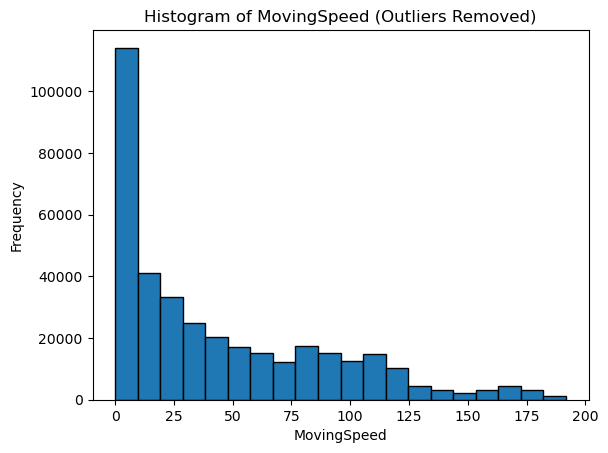

In [33]:
import matplotlib.pyplot as plt

df = pd.read_csv('../dataset/train_136/train_136.csv',sep=';')

# Calculate IQR (Interquartile Range)
Q1 = df['MovingSpeed'].quantile(0.25)
Q3 = df['MovingSpeed'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers removal
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
filtered_df = df[(df['MovingSpeed'] >= lower_bound) & (df['MovingSpeed'] <= upper_bound)]

# Build histogram
plt.hist(filtered_df['MovingSpeed'], bins=20, edgecolor='black')
plt.title('Histogram of MovingSpeed (Outliers Removed)')
plt.xlabel('MovingSpeed')
plt.ylabel('Frequency')
plt.show()

In [47]:
import plotly.express as px

# Select range
start_date = pd.Timestamp('2023-01-01',tz='Europe/Brussels')
end_date = pd.Timestamp('2023-03-01',tz='Europe/Brussels')


filtered_df_time = filtered_df.set_index('timestamps_UTC')
filtered_df_time.index = pd.to_datetime(filtered_df_time.index, utc=True)  # Make the index tz-aware


# Apply rolling window for smoothing\
window_size = '5T'
smoothed_df = filtered_df_time.rolling(window_size).mean()

# Filter rows between the specified dates\
# Convert start_date and end_date to the same type as the index
start_date = pd.to_datetime(start_date)
end_date = pd.to_datetime(end_date)
df_to_plot = smoothed_df[(smoothed_df.index >= start_date) & (smoothed_df.index <= end_date)]

# Create a time series plot with Plotly Express
fig = px.line(df_to_plot, x=df_to_plot.index, y='MovingSpeed', title='MovingSpeed Time Series (Outliers Removed)')
fig.update_layout(xaxis_title='Timestamp', yaxis_title='MovingSpeed')
fig.show()

C:\Users\mouli\AppData\Local\Temp\ipykernel_2860\962475232.py:14: FutureWarning:

Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['Insert_Datetime', 'RS_E_InAirTemp_Delta',
       'RS_E_InAirTemp_Delta_Percent', 'RS_E_InAirTemp_PC1',
       'RS_E_InAirTemp_PC1_AVG_DAY', 'RS_E_InAirTemp_PC2',
       'RS_E_InAirTemp_PC2_AVG_DAY', 'RS_E_OilPress_Delta',
       'RS_E_OilPress_Delta_Percent', 'RS_E_OilPress_PC1',
       'RS_E_OilPress_PC1_AVG_DAY', 'RS_E_OilPress_PC2',
       'RS_E_OilPress_PC2_AVG_DAY', 'RS_E_RPM_Delta', 'RS_E_RPM_Delta_Percent',
       'RS_E_RPM_PC1', 'RS_E_RPM_PC1_AVG_DAY', 'RS_E_RPM_PC2',
       'RS_E_RPM_PC2_AVG_DAY', 'RS_E_WatTemp_Delta',
       'RS_E_WatTemp_Delta_Percent', 'RS_E_WatTemp_PC1',
       'RS_E_WatTemp_PC1_AVG_DAY', 'RS_E_WatTemp_PC2',
       'RS_E_WatTemp_PC2_AVG_DAY', 'RS_T_OilTemp_Delta',
       'RS_T_OilT

In [ ]:
px.scatter(df, x='MovingSpeed',y='RS_E_RPM_PC1')


In [ ]:
df['RS_E_RPM_PC1'] = df['RS_E_RPM_PC1'].astype(float) 

In [46]:
pd.to_datetime(start_date)

Timestamp('2023-01-01 00:00:00+0100', tz='Europe/Brussels')

In [48]:
df_info = pd.read_csv('../dataset/tbl_DistancesJours.csv', sep=';')
df_info

,vehicle_id,date,total_distance
0,102,23/01/2023,"235903,5408"
1,102,24/01/2023,"170440,3737"
2,102,25/01/2023,"351584,6563"
3,102,26/01/2023,"420269,3229"
4,102,27/01/2023,"160746,3085"
...,...,...,...
15729,197,05/09/2023,"29101,9679"
15730,197,08/09/2023,"14818,80806"
15731,197,11/09/2023,"292531,5143"
15732,197,12/09/2023,"587744,3653"
